Assignment: - To Run a Simulation to Check Flow Over a Cylinder.  Fluid Properties: Water Liquid
 Material: Vertical Cylinder
 Diameter Of Material: 1 Metre
 Fluid Reynold’s Number: 40
 Mach Number: 0.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

This is the experiment which is called Von Karmann Vortex Effect Over the Vertical
Cylinder. Von Karman Vortex Effect is a recurring pattern of whirling vortices in fluid
dynamics that is brought on by the process of vortex shedding, which is what causes the
fluid flow to be unsteadily separated about the blunt objects. In this simulation, fluid is taken as a water liquid, general properties of a water liquid is
that the density of water liquid is 1000kg/m3 at temperature 4
0C and viscosity of water liquid is 10.
-3 Pa-s. Material taken in this experiment is Cylinder which is withstand
vertical circumference or face or base of the cylinder directed perpendicular to the fluid
flow. Diameter Of Cylinder is taken as 1 meter. Reynold’s Number of fluid flow is taken
as 40 which implies that the fluid flow is steady and laminar. Mach Number is 0.3 which
implies that the fluid flow is incompressible which implies that the temperature over the
fluid flow remains constant. In this simulation, we have to check the unsteadiness of the
steady flow of fluid about the blunt object when the steady flow pass over the cylinder
and then the unsteady separation of the fluid which will be check by the contour and
streamlines.

A vortex street forms only at a certain range of flow velocities, specified by a range of Reynolds numbers (Re), typically above a limiting Re value of about 90. The (global) Reynolds number for a flow is a measure of the ratio of inertial to viscous forces in the flow of a fluid around a body or in a channel, and may be defined as a nondimensional parameter of the global speed of the whole fluid flow:

Re=(U*L)/kin vis.

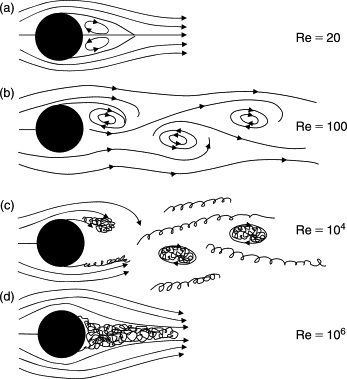

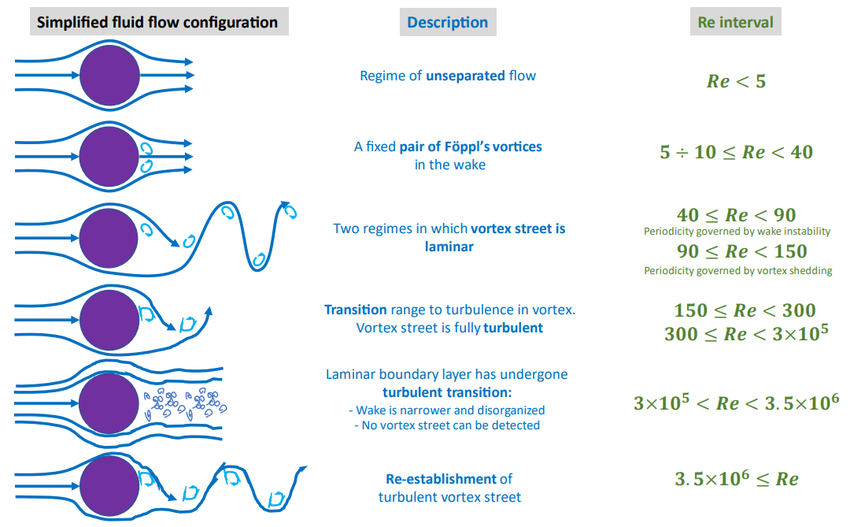

Inside Ansys Post Processing:-
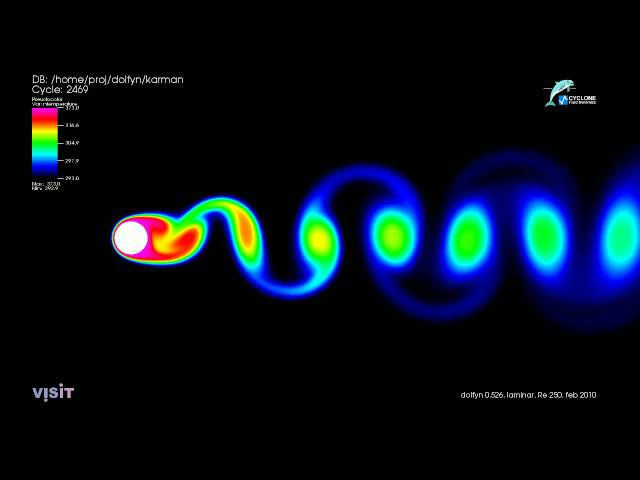

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants
Re = 40          # Reynolds number
M = 0.3          # Mach number
D = 1            # Diameter of the cylinder
u = M * 343      # Velocity in m/s (Speed of sound at sea level)
L = D            # Characteristic length
N = 100          # Number of grid points
X, Y = np.meshgrid(np.linspace(-3*L, 3*L, N), np.linspace(-3*L, 3*L, N))
dt = 0.1         # Timestep for pathline integration
T = 20           # Total time for pathline integration
r_cylinder = D / 2 # Radius of the cylinder


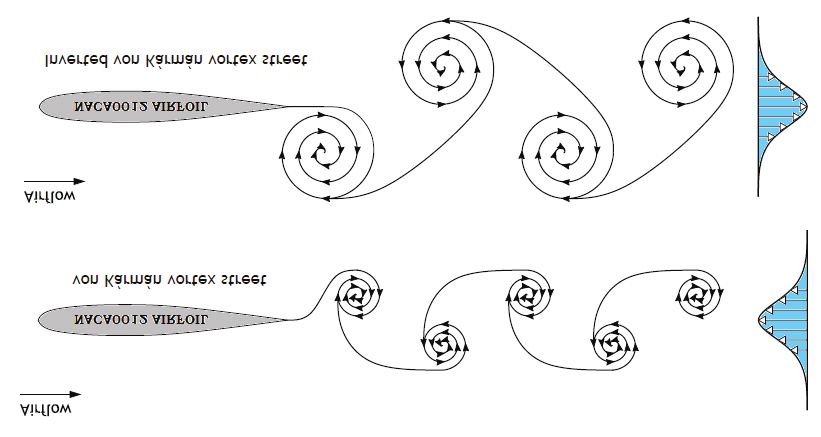

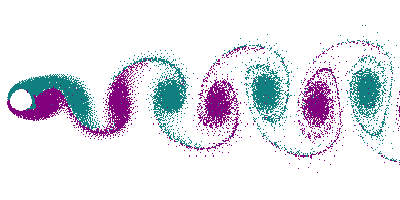

In [2]:

# Define velocity field function
def velocity_field(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    u = (1 - np.exp(-r**2)) * np.cos(theta) * M * 343
    v = -(1 - np.exp(-r**2)) * np.sin(theta) * M * 343
    return u, v


In [3]:

# Streamline plot
def streamline_plot():
    u, v = velocity_field(X, Y)
    plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Streamlines')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [4]:

# Contour plot
def contour_plot():
    u, v = velocity_field(X, Y)
    speed = np.sqrt(u**2 + v**2)
    plt.contourf(X, Y, speed, cmap='viridis')
    plt.colorbar(label='Speed (m/s)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Contour Plot')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [5]:

# Pathline plot
def pathline_plot():
    def pathline_derivatives(r, t):
        x, y = r
        u, v = velocity_field(x, y)
        return [u, v]

    t = np.linspace(0, T, int(T/dt))
    initial_positions = [[r_cylinder * np.cos(theta), r_cylinder * np.sin(theta)] for theta in np.linspace(0, 2*np.pi, 10)]
    for pos in initial_positions:
        path = odeint(pathline_derivatives, pos, t)
        plt.plot(path[:,0], path[:,1], 'b-', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Pathlines')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


In [6]:

# Vorticity plot
def vorticity_plot():
    x = np.linspace(-3*L, 3*L, N)
    y = np.linspace(-3*L, 3*L, N)
    X, Y = np.meshgrid(x, y)
    u, v = velocity_field(X, Y)
    vorticity = np.gradient(v, axis=0) - np.gradient(u, axis=1)
    plt.contourf(X, Y, vorticity, cmap='RdBu', levels=20)
    plt.colorbar(label='Vorticity')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vorticity Plot')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


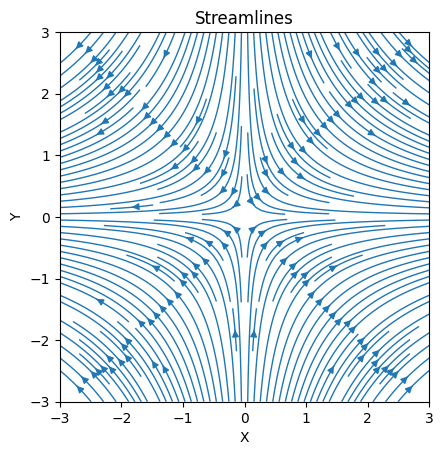

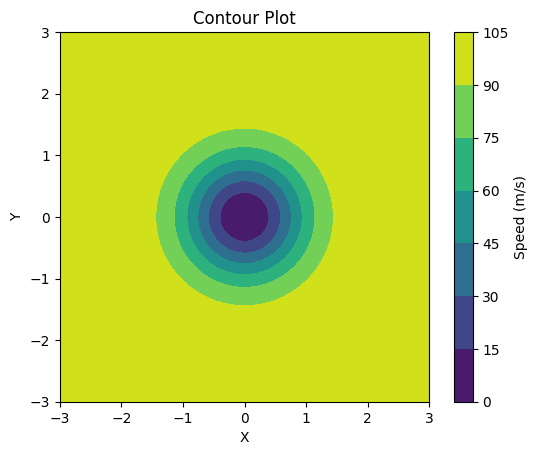

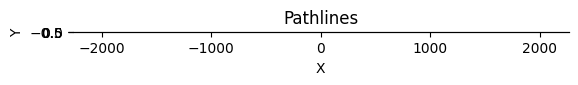

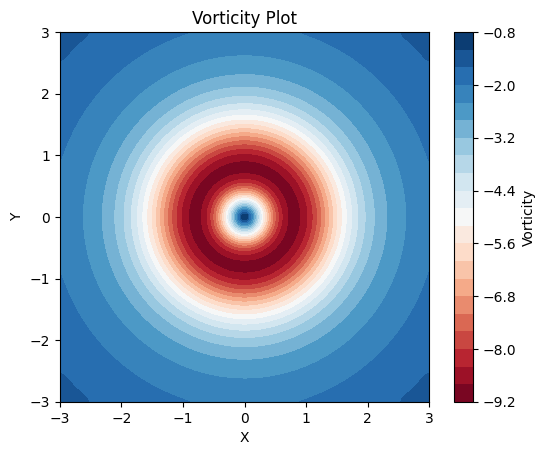

In [7]:

# Main program
streamline_plot()
contour_plot()
pathline_plot()
vorticity_plot()
